In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("wordsforthewise/lending-club")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/lending-club


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Proceeding with this file - accepted_2007_to_2018q4.csv: since this is the complete Lending Club dataset of funded loans from 2007 to 2018

In [ ]:
import os

# List all files in the dataset directory
dataset_dir = "/kaggle/input/lending-club"
files = os.listdir(dataset_dir)

print("Files inside lending-club dataset folder:")
for f in files:
    print(f)


Files inside lending-club dataset folder:
rejected_2007_to_2018Q4.csv.gz
accepted_2007_to_2018Q4.csv.gz
accepted_2007_to_2018q4.csv
rejected_2007_to_2018q4.csv


In [ ]:
import os

folder_path = "/kaggle/input/lending-club/accepted_2007_to_2018q4.csv"
files_inside = os.listdir(folder_path)

print("Files inside 'accepted_2007_to_2018q4.csv' directory:")
for f in files_inside:
    print(f)


Files inside 'accepted_2007_to_2018q4.csv' directory:
accepted_2007_to_2018Q4.csv


Note: The .csv file was inside a folder with the same name, which can cause some confusion. We fixed it by inspecting the folder structure using os.listdir()


In [ ]:
import pandas as pd
import os

folder_path = "/kaggle/input/lending-club/accepted_2007_to_2018q4.csv"
file_name = "accepted_2007_to_2018Q4.csv"

# Build full path and load sample data
full_path = os.path.join(folder_path, file_name)

df = pd.read_csv(full_path, low_memory=False, nrows=200_000)

print("Shape:", df.shape)
df.head()


Shape: (200000, 151)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


We loaded the first 200,000 rows of the CSV to keep things light and fast for initial analysis:



In [ ]:
# Filter Loans with Known Outcomes--We want to focus only on loans that were either repaid (Fully Paid) or defaulted (Charged Off).

df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

print(df['loan_status'].value_counts())

loan_status
Fully Paid     140992
Charged Off     35090
Name: count, dtype: int64


In [ ]:
#Creating Binary Target Variable--
#1 = Charged Off (i.e., default)
#0 = Fully Paid

df['default'] = df['loan_status'].apply(lambda x:1 if x=='Charged Off' else 0)

# Check target balance
print(df['default'].value_counts(normalize=True))

default
0    0.800718
1    0.199282
Name: proportion, dtype: float64


0 ----   0.800718  →  80.07% Fully Paid

1 ----   0.199282  →  19.93% Charged Off (Defaulted)


In [ ]:
#just for my understanding

import pandas as pd
import numpy as np

### 1.  Detect Likely Leakage Variables
leakage_keywords = ['recover', 'last_pymnt', 'next_pymnt', 'total_pymnt', 'collection', 'out_prncp']
leakage_cols = [col for col in df.columns if any(key in col.lower() for key in leakage_keywords)]

print(" Possible leakage variables (to drop):")
print(leakage_cols)

### 2.  Missing Value Summary
missing = df.isnull().mean().sort_values(ascending=False)
print("\n Top 20 columns with missing values:")
print(missing.head(20))

### 3.  Correlation with Target (Numerical Only)
# Convert categorical columns to numeric if needed (for fast check, use auto select)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col != 'default']

correlation = df[numerical_cols + ['default']].corr()['default'].sort_values(ascending=False)

print("\n Features most positively correlated with default:")
print(correlation.head(10))

print("\n Features most negatively correlated with default:")
print(correlation.tail(10))


🔥 Possible leakage variables (to drop):
['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'collections_12_mths_ex_med', 'sec_app_collections_12_mths_ex_med']

📉 Top 20 columns with missing values:
member_id                                     1.000000
sec_app_collections_12_mths_ex_med            1.000000
sec_app_chargeoff_within_12_mths              1.000000
sec_app_num_rev_accts                         1.000000
sec_app_open_act_il                           1.000000
sec_app_revol_util                            1.000000
sec_app_open_acc                              1.000000
next_pymnt_d                                  1.000000
sec_app_mths_since_last_major_derog           1.000000
sec_app_earliest_cr_line                      1.000000
sec_app_inq_last_6mths                        1.000000
revol_bal_joint                               1.000000
sec_app_fico_range_low              

In [ ]:
# Select Key Features for Modeling

selected_features = [
    'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade',
    'emp_length', 'home_ownership', 'annual_inc',
    'purpose', 'dti', 'delinq_2yrs', 'revol_util',
    'earliest_cr_line', 'open_acc', 'total_acc', 'default'
]

df = df[selected_features].copy()


In [ ]:
df[selected_features].head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,purpose,dti,delinq_2yrs,revol_util,earliest_cr_line,open_acc,total_acc,default
0,3600.0,36 months,13.99,C,C4,10+ years,MORTGAGE,55000.0,debt_consolidation,5.91,0.0,29.7,Aug-2003,7.0,13.0,0
1,24700.0,36 months,11.99,C,C1,10+ years,MORTGAGE,65000.0,small_business,16.06,1.0,19.2,Dec-1999,22.0,38.0,0
2,20000.0,60 months,10.78,B,B4,10+ years,MORTGAGE,63000.0,home_improvement,10.78,0.0,56.2,Aug-2000,6.0,18.0,0
4,10400.0,60 months,22.45,F,F1,3 years,MORTGAGE,104433.0,major_purchase,25.37,1.0,64.5,Jun-1998,12.0,35.0,0
5,11950.0,36 months,13.44,C,C3,4 years,RENT,34000.0,debt_consolidation,10.20,0.0,68.4,Oct-1987,5.0,6.0,0


In [ ]:
df[selected_features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 176082 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_amnt         176082 non-null  float64
 1   term              176082 non-null  object 
 2   int_rate          176082 non-null  float64
 3   grade             176082 non-null  object 
 4   sub_grade         176082 non-null  object 
 5   emp_length        164948 non-null  object 
 6   home_ownership    176082 non-null  object 
 7   annual_inc        176082 non-null  float64
 8   purpose           176082 non-null  object 
 9   dti               176080 non-null  float64
 10  delinq_2yrs       176082 non-null  float64
 11  revol_util        176013 non-null  float64
 12  earliest_cr_line  176082 non-null  object 
 13  open_acc          176082 non-null  float64
 14  total_acc         176082 non-null  float64
 15  default           176082 non-null  int64  
dtypes: float64(8), int64(1), 

In [ ]:
# Clean and Transform

df['term'] = df['term'].str.extract('(\d+)').astype(float)

In [ ]:
#Convert emp_length to numeric

def clean_emp_length(x):
    if pd.isnull(x): return None           # Handle missing Vlues
    if'<'in x:return 0.                     #'<1 year' becomes 0
    if '10+'in x:return 10                  # '10+ years' becomes 10
    return int(x.strip().split()[0])        #'2 years' takes the numbr part i.e 2

df['emp_length'] = df['emp_length'].apply(clean_emp_length)

In [ ]:
#  Drop rows with missing values in key features
df.dropna(subset=['loan_amnt', 'term', 'int_rate', 'grade', 'annual_inc', 'dti'], inplace=True)


**Summary of What We did above**

Filtered loan statuses	Only kept Fully Paid and Charged Off

Created target column	default = 1 (Charged Off), 0 (Fully Paid)

Selected features	Picked 15 core variables for EDA/modeling

Cleaned columns	Converted strings to numbers (term, emp_length)

Dropped missing values	Removed rows with nulls in important fields

**Exploratory Data Analysis (EDA)**

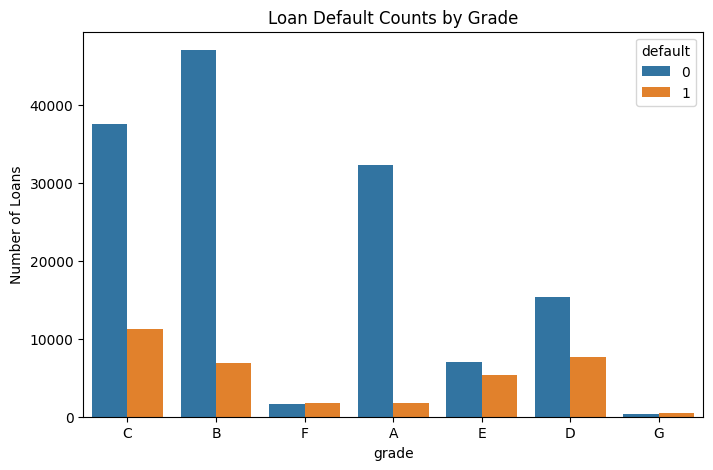

In [ ]:
#Univariate Distribution: Default by Loan Grade

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='grade', hue='default')
plt.title("Loan Default Counts by Grade")
plt.ylabel("Number of Loans")
plt.show()

Grade is a strong predictor of risk — it encapsulates many creditworthiness indicators.

Grade B and C loans are the most common.

As grade drops from A → G, default counts increase relatively.

Higher grades (A, B) are safer, while lower grades (D, E, F, G) have more defaults.



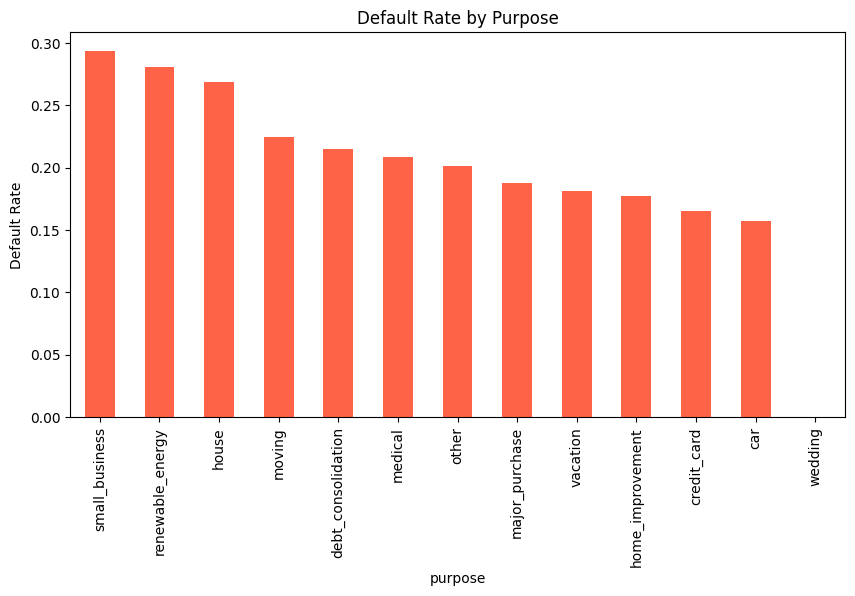

In [ ]:
#Default Rate by Purpose

default_by_purpose = df.groupby('purpose')['default'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
default_by_purpose.plot(kind='bar', color = 'tomato')
plt.title("Default Rate by Purpose")
plt.ylabel("Default Rate")
plt.show()

This shows that why someone takes a loan matters a lot. Business and house loans might be riskier due to larger amounts or instability.

Small Business, Renewable Energy, and House loans show the highest default rates (≈ 25–30%).

Lower default purposes include Car, Credit Card, and Wedding loans.



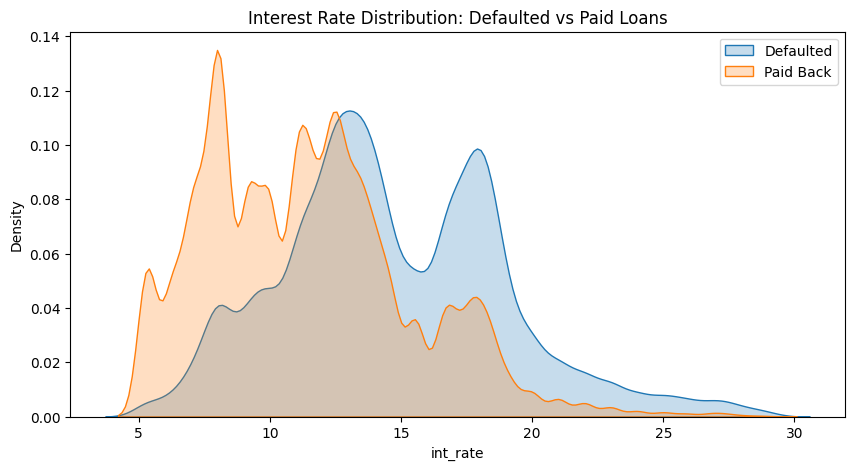

In [ ]:
# Comparing Distributions: Interest Rate for Defaulters vs Non-Defaulters

plt.figure(figsize=(10,5))
sns.kdeplot(data=df[df['default']==1], x='int_rate', label='Defaulted', fill=True)
sns.kdeplot(data=df[df['default']==0], x='int_rate', label='Paid Back', fill=True)
plt.title("Interest Rate Distribution: Defaulted vs Paid Loans")
plt.legend()
plt.show()



This aligns with risk-based pricing: riskier borrowers get higher interest rates, and many do default.

Loans with higher interest rates (15%–25%) are more likely to default.

Fully paid loans tend to have lower interest rates.

There's a clear separation between defaulters and non-defaulters in interest distribution.



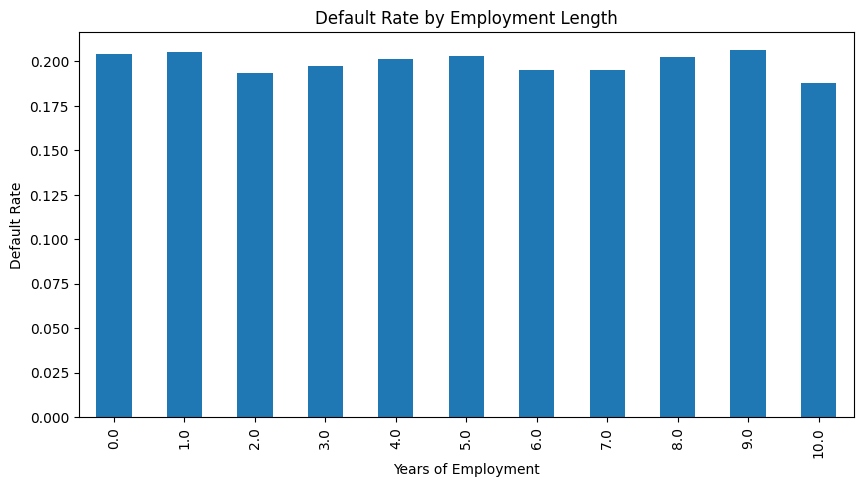

In [ ]:
# Default Rate vs Employment Length

emp_default =df.groupby('emp_length')['default'].mean()

plt.figure(figsize=(10,5))
emp_default.plot(kind='bar')
plt.title("Default Rate by Employment Length")
plt.ylabel("Default Rate")
plt.xlabel('Years of Employment')
plt.show()

While not highly predictive alone, this can still be useful when combined with other features like income, DTI, or grade.

No strong trend, but people with very short employment (0–1 years) and some mid-range years (4–5 years) seem to have slightly higher default rates.

10+ years of employment shows a bit lower default rate, as expected.



**Preprocessing for Modeling**

In [ ]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,purpose,dti,delinq_2yrs,revol_util,earliest_cr_line,open_acc,total_acc,default
0,3600.0,36.0,13.99,C,C4,10.0,MORTGAGE,55000.0,debt_consolidation,5.91,0.0,29.7,Aug-2003,7.0,13.0,0
1,24700.0,36.0,11.99,C,C1,10.0,MORTGAGE,65000.0,small_business,16.06,1.0,19.2,Dec-1999,22.0,38.0,0
2,20000.0,60.0,10.78,B,B4,10.0,MORTGAGE,63000.0,home_improvement,10.78,0.0,56.2,Aug-2000,6.0,18.0,0
4,10400.0,60.0,22.45,F,F1,3.0,MORTGAGE,104433.0,major_purchase,25.37,1.0,64.5,Jun-1998,12.0,35.0,0
5,11950.0,36.0,13.44,C,C3,4.0,RENT,34000.0,debt_consolidation,10.20,0.0,68.4,Oct-1987,5.0,6.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176080 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_amnt         176080 non-null  float64
 1   term              176080 non-null  float64
 2   int_rate          176080 non-null  float64
 3   grade             176080 non-null  object 
 4   sub_grade         176080 non-null  object 
 5   emp_length        164948 non-null  float64
 6   home_ownership    176080 non-null  object 
 7   annual_inc        176080 non-null  float64
 8   purpose           176080 non-null  object 
 9   dti               176080 non-null  float64
 10  delinq_2yrs       176080 non-null  float64
 11  revol_util        176011 non-null  float64
 12  earliest_cr_line  176080 non-null  object 
 13  open_acc          176080 non-null  float64
 14  total_acc         176080 non-null  float64
 15  default           176080 non-null  int64  
dtypes: float64(10), int64(1),

In [ ]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
grade,0
sub_grade,0
emp_length,11132
home_ownership,0
annual_inc,0
purpose,0
dti,0


In [ ]:
df.dtypes

,0
loan_amnt,float64
term,float64
int_rate,float64
grade,object
sub_grade,object
emp_length,float64
home_ownership,object
annual_inc,float64
purpose,object
dti,float64


In [ ]:
# fill missing values with median
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].median())

#emp_length with median
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].median())

Feature Engineering: Credit History Length

In [ ]:
from datetime import datetime

# Convert earliest_cr_line to datetime and calculate credit history in years
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce') # coerce converts any invaliid entries to NAN
df['credit_history_length'] = datetime.today().year - df['earliest_cr_line'].dt.year

# Dropping original date column
df.drop('earliest_cr_line', axis=1, inplace=True)

In [ ]:
#Encoding the Categorical Variables

from sklearn.preprocessing import LabelEncoder

# Encode grade, sub_grade, purpose, home_ownership
for col in ['grade', 'sub_grade', 'purpose', 'home_ownership']:
    df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176080 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              176080 non-null  float64
 1   term                   176080 non-null  float64
 2   int_rate               176080 non-null  float64
 3   grade                  176080 non-null  int64  
 4   sub_grade              176080 non-null  int64  
 5   emp_length             176080 non-null  float64
 6   home_ownership         176080 non-null  int64  
 7   annual_inc             176080 non-null  float64
 8   purpose                176080 non-null  int64  
 9   dti                    176080 non-null  float64
 10  delinq_2yrs            176080 non-null  float64
 11  revol_util             176080 non-null  float64
 12  open_acc               176080 non-null  float64
 13  total_acc              176080 non-null  float64
 14  default                176080 non-null  i

In [ ]:
# Define features and Target

target = 'default'
features = [col for col in df.columns if col!=target]

X = df[features]
y = df[target]

print('X shape:', X.shape)
print('y value counts:\n', y.value_counts())

X shape: (176080, 15)
y value counts:
 default
0    140991
1     35089
Name: count, dtype: int64


In [ ]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,purpose,dti,delinq_2yrs,revol_util,open_acc,total_acc,default,credit_history_length
0,3600.0,36.0,13.99,2,13,10.0,1,55000.0,2,5.91,0.0,29.7,7.0,13.0,0,22
1,24700.0,36.0,11.99,2,10,10.0,1,65000.0,10,16.06,1.0,19.2,22.0,38.0,0,26
2,20000.0,60.0,10.78,1,8,10.0,1,63000.0,3,10.78,0.0,56.2,6.0,18.0,0,25
4,10400.0,60.0,22.45,5,25,3.0,1,104433.0,5,25.37,1.0,64.5,12.0,35.0,0,27
5,11950.0,36.0,13.44,2,12,4.0,3,34000.0,2,10.20,0.0,68.4,5.0,6.0,0,38


**Modeling**

Split the Data

In [ ]:
from sklearn.model_selection import train_test_split

# Features and Target
X = df.drop(columns=['default'])
y = df['default']

# Stratified split to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Default rate in train:", y_train.mean())  #≈ % of defaults in training set
print("Default rate in test:", y_test.mean())    #≈ % of defaults in test set




Train shape: (140864, 15)
Test shape: (35216, 15)
Default rate in train: 0.1992773171285779
Default rate in test: 0.19928441617446616


Our target (y) — which is default — is imbalanced:

~80% of borrowers didn’t default i.e(paid back) - (0)

~20% did default - (1)

If we split randomly without stratifying, we might accidentally:

Put too many defaulters in one set (train or test)

Get misleading model performance

So we use **stratify**=y to keep the same proportion (80/20) of classes in both train and test sets.


y_train.mean() and y_test.mean() gives a quick way to confirm that stratification worked — both train and test sets should have a similar default rate.
i.e 19.9% in training and 19.9% in test

Training a Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    class_weight='balanced', # Handling imbalance
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

Evaluate the Performance

              precision    recall  f1-score   support

           0       0.89      0.69      0.78     28198
           1       0.34      0.66      0.45      7018

    accuracy                           0.68     35216
   macro avg       0.62      0.67      0.61     35216
weighted avg       0.78      0.68      0.71     35216

AUC_ROC: 0.7386
Confusion Matrix:
 [[19392  8806]
 [ 2387  4631]]


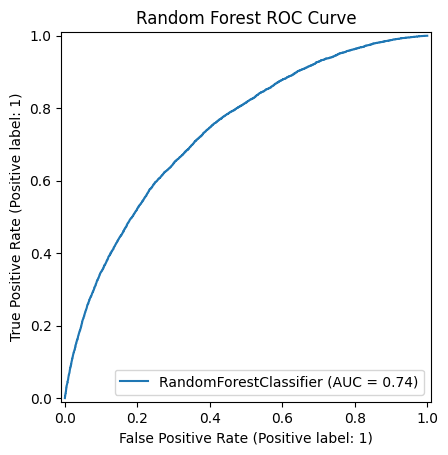

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay

#Predictions
y_pred =  rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[: , 1]

#Classification Report
print(classification_report(y_test, y_pred))

#AUC-ROC
auc = roc_auc_score(y_test, y_proba)
print("AUC_ROC:", round(auc, 4))

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

#ROC CURVE
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest ROC Curve")
plt.show()

[[19392  8806]   → Class 0 (Paid): 88 wrong defaults predicted

 [ 2387  4631]]   → Class 1 (Default): 4631 caught correctly

XGBoost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

Preparing Data for XGBoost

In [ ]:
# Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

XGBoost prefers DMatrix, but you can use regular NumPy or pandas arrays too.

Train the XGBoost Model

In [ ]:
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(len(y_train[y_train == 0]) / len(y_train[y_train == 1])),  # for imbalance
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Evaluate Performance

In [ ]:
#Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:,1]

#Classification report
print("XGBoost Classification Report")
print(classification_report(y_test, y_pred_xgb))

#AUC-ROC
print("AUC-ROC Score:", round(roc_auc_score(y_test, y_proba_xgb),4))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.89      0.68      0.77     28198
           1       0.34      0.67      0.45      7018

    accuracy                           0.68     35216
   macro avg       0.62      0.68      0.61     35216
weighted avg       0.78      0.68      0.71     35216

AUC-ROC Score: 0.7411
Confusion Matrix:
 [[19158  9040]
 [ 2296  4722]]


Plot ROC Curve

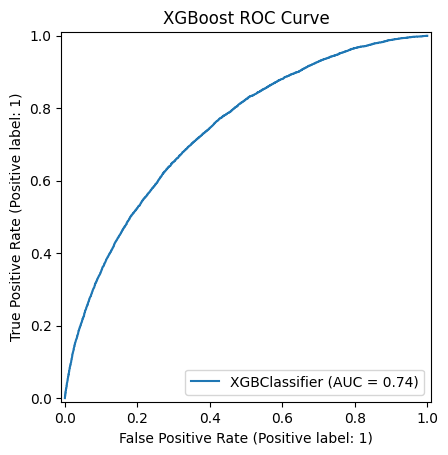

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title("XGBoost ROC Curve")
plt.show()

[[19158  9040]     # Class 0: 9040 false alarms (predicted default but they paid)

 [ 2296  4722]]    # Class 1: 2296 missed defaulters (false negatives)

 Slightly fewer false negatives than Random Forest (better recall)

But a bit more false positives too

**XGBoost performs slightly better, but not significantly — it's a solid model, and a great base to tune further.**

LightGBM model

In [ ]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

In [ ]:
# Training

lgb_model = lgb.LGBMClassifier(
    objective='binary',
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    class_weight='balanced',  # important for imbalance
    random_state=42
)
lgb_model.fit(X_train, y_train)

LGBMClassifier(class_weight='balanced', learning_rate=0.05, max_depth=6,
               n_estimators=200, objective='binary', random_state=42)

In [ ]:
#Performance Evaluation

y_pred_lgb = lgb_model.predict(X_test)
y_proba_lgb = lgb_model.predict_proba(X_test)[:,1]

print("LightGBM Classification Report")
print(classification_report(y_test, y_pred_lgb))

auc_lgb = roc_auc_score(y_test, y_proba_lgb)
print("AUC-ROC Score:", round(auc_lgb,4))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))

LightGBM Classification Report
              precision    recall  f1-score   support

           0       0.89      0.68      0.77     28198
           1       0.34      0.68      0.46      7018

    accuracy                           0.68     35216
   macro avg       0.62      0.68      0.61     35216
weighted avg       0.78      0.68      0.71     35216

AUC-ROC Score: 0.7426
Confusion Matrix:
 [[19058  9140]
 [ 2253  4765]]


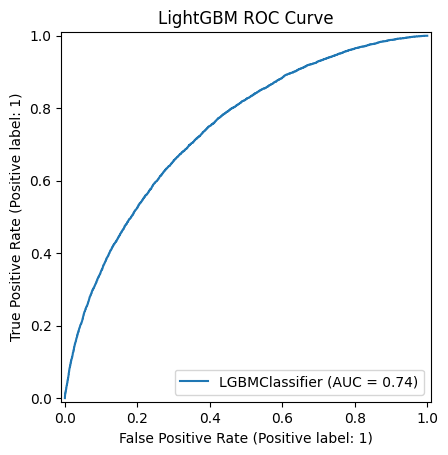

In [ ]:
RocCurveDisplay.from_estimator(lgb_model, X_test, y_test)
plt.title("LightGBM ROC Curve")
plt.show()


AUC-ROC: 0.7426
Slight improvement over Random Forest (0.7386) and XGBoost (0.7411)

Model continues to be good at ranking who will default

[[19058  9140]     # Class 0 (Paid): 9140 false alarms

 [ 2253  4765]]    # Class 1 (Default): 4765 true positives

 LightGBM had fewer missed defaulters (false negatives ) and slightly more accurate catches than XGBoost or RF.

**Hyperparameter Tuning with Optuna**

(to boost model performance and reduce false negatives)

In [ ]:
!pip install optuna

In [ ]:
import optuna
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
# Define Optuna Objective Function

import lightgbm as lgb
from datetime import datetime
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay
import xgboost as xgb
import optuna

def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'n_estimators': 300,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'class_weight': 'balanced'
    }

    aucs = []
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    for train_idx, valid_idx in skf.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[valid_idx]

        model = LGBMClassifier(**params)
        model.fit(
            X_tr, y_tr,
            eval_set=[(X_val, y_val)],
            callbacks=[lgb.early_stopping(stopping_rounds=20)]
        )

        preds = model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, preds)
        aucs.append(auc)

    return sum(aucs) / len(aucs)


In [ ]:
# Run Optuna Optimization

sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=30) # can be increased for better tuning

print("Best AUC:", study.best_value)
print("Best Params:", study.best_params)

[I 2025-07-02 22:48:59,774] A new study created in memory with name: no-name-5f3e4ba8-48dd-42e7-8b19-e7e0a961b340


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[65]	valid_0's auc: 0.731499
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.739638
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[68]	valid_0's auc: 0.737476


[I 2025-07-02 22:49:19,556] Trial 0 finished with value: 0.7362042161479376 and parameters: {'learning_rate': 0.08116262258099886, 'num_leaves': 97, 'max_depth': 8, 'min_child_samples': 64, 'subsample': 0.5780093202212182, 'colsample_bytree': 0.5779972601681014}. Best is trial 0 with value: 0.7362042161479376.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[224]	valid_0's auc: 0.731841
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[258]	valid_0's auc: 0.73817
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[227]	valid_0's auc: 0.736493


[I 2025-07-02 22:50:19,240] Trial 1 finished with value: 0.7355014150921056 and parameters: {'learning_rate': 0.021035886311957897, 'num_leaves': 90, 'max_depth': 7, 'min_child_samples': 74, 'subsample': 0.5102922471479012, 'colsample_bytree': 0.9849549260809971}. Best is trial 0 with value: 0.7362042161479376.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.732983
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.739992
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[69]	valid_0's auc: 0.738058


[I 2025-07-02 22:50:35,070] Trial 2 finished with value: 0.737010793367085 and parameters: {'learning_rate': 0.16816410175208013, 'num_leaves': 37, 'max_depth': 4, 'min_child_samples': 26, 'subsample': 0.6521211214797689, 'colsample_bytree': 0.762378215816119}. Best is trial 2 with value: 0.737010793367085.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.732708
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.739789
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[64]	valid_0's auc: 0.737802


[I 2025-07-02 22:50:42,887] Trial 3 finished with value: 0.7367660827301092 and parameters: {'learning_rate': 0.092069553542002, 'num_leaves': 43, 'max_depth': 7, 'min_child_samples': 22, 'subsample': 0.6460723242676091, 'colsample_bytree': 0.6831809216468459}. Best is trial 2 with value: 0.737010793367085.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[106]	valid_0's auc: 0.733379
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[112]	valid_0's auc: 0.740502
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[157]	valid_0's auc: 0.738454


[I 2025-07-02 22:50:53,758] Trial 4 finished with value: 0.7374448547284128 and parameters: {'learning_rate': 0.09665329700123683, 'num_leaves': 83, 'max_depth': 4, 'min_child_samples': 56, 'subsample': 0.7962072844310213, 'colsample_bytree': 0.5232252063599989}. Best is trial 4 with value: 0.7374448547284128.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[102]	valid_0's auc: 0.733338
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[148]	valid_0's auc: 0.740844
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[168]	valid_0's auc: 0.738984


[I 2025-07-02 22:51:04,683] Trial 5 finished with value: 0.7377223108851815 and parameters: {'learning_rate': 0.1254335218612733, 'num_leaves': 33, 'max_depth': 3, 'min_child_samples': 96, 'subsample': 0.9828160165372797, 'colsample_bytree': 0.9041986740582306}. Best is trial 5 with value: 0.7377223108851815.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[78]	valid_0's auc: 0.732576
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[106]	valid_0's auc: 0.740149
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[91]	valid_0's auc: 0.737972


[I 2025-07-02 22:51:15,399] Trial 6 finished with value: 0.7368988056834088 and parameters: {'learning_rate': 0.06787661614294042, 'num_leaves': 27, 'max_depth': 8, 'min_child_samples': 50, 'subsample': 0.5610191174223894, 'colsample_bytree': 0.7475884550556351}. Best is trial 5 with value: 0.7377223108851815.


Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[298]	valid_0's auc: 0.732929
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's auc: 0.740031
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's auc: 0.737993


[I 2025-07-02 22:51:41,808] Trial 7 finished with value: 0.736984297958981 and parameters: {'learning_rate': 0.016533819011891496, 'num_leaves': 93, 'max_depth': 5, 'min_child_samples': 70, 'subsample': 0.6558555380447055, 'colsample_bytree': 0.7600340105889054}. Best is trial 5 with value: 0.7377223108851815.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.732387
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.739768
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.737266


[I 2025-07-02 22:51:48,043] Trial 8 finished with value: 0.736473572706989 and parameters: {'learning_rate': 0.11387495307522313, 'num_leaves': 34, 'max_depth': 10, 'min_child_samples': 80, 'subsample': 0.9697494707820946, 'colsample_bytree': 0.9474136752138245}. Best is trial 5 with value: 0.7377223108851815.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[109]	valid_0's auc: 0.733404
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[124]	valid_0's auc: 0.740512
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[157]	valid_0's auc: 0.738116


[I 2025-07-02 22:51:58,667] Trial 9 finished with value: 0.7373441660755167 and parameters: {'learning_rate': 0.12360099597410618, 'num_leaves': 94, 'max_depth': 3, 'min_child_samples': 27, 'subsample': 0.522613644455269, 'colsample_bytree': 0.6626651653816322}. Best is trial 5 with value: 0.7377223108851815.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.732735
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.739738
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.737761


[I 2025-07-02 22:52:04,899] Trial 10 finished with value: 0.7367450678596844 and parameters: {'learning_rate': 0.191452961965154, 'num_leaves': 58, 'max_depth': 5, 'min_child_samples': 96, 'subsample': 0.991948117710163, 'colsample_bytree': 0.8911886349434088}. Best is trial 5 with value: 0.7377223108851815.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 0.733316
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[105]	valid_0's auc: 0.740806
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[220]	valid_0's auc: 0.739114


[I 2025-07-02 22:52:20,047] Trial 11 finished with value: 0.7377453338180908 and parameters: {'learning_rate': 0.1418268129501248, 'num_leaves': 73, 'max_depth': 3, 'min_child_samples': 100, 'subsample': 0.8591901910708761, 'colsample_bytree': 0.5043430179983346}. Best is trial 11 with value: 0.7377453338180908.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[112]	valid_0's auc: 0.73335
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[133]	valid_0's auc: 0.74083
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[144]	valid_0's auc: 0.738435


[I 2025-07-02 22:52:31,755] Trial 12 finished with value: 0.7375382525582976 and parameters: {'learning_rate': 0.14406117353861786, 'num_leaves': 71, 'max_depth': 3, 'min_child_samples': 98, 'subsample': 0.8681752605328172, 'colsample_bytree': 0.86455487052465}. Best is trial 11 with value: 0.7377453338180908.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.73286
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.740273
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[71]	valid_0's auc: 0.738307


[I 2025-07-02 22:52:38,483] Trial 13 finished with value: 0.7371470582873786 and parameters: {'learning_rate': 0.14795599597091824, 'num_leaves': 53, 'max_depth': 5, 'min_child_samples': 88, 'subsample': 0.8892016965842912, 'colsample_bytree': 0.839539764092939}. Best is trial 11 with value: 0.7377453338180908.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[125]	valid_0's auc: 0.733457
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 0.741141
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[187]	valid_0's auc: 0.739056


[I 2025-07-02 22:52:49,386] Trial 14 finished with value: 0.7378845266236552 and parameters: {'learning_rate': 0.14322089312481434, 'num_leaves': 68, 'max_depth': 3, 'min_child_samples': 100, 'subsample': 0.8991858614907839, 'colsample_bytree': 0.5124235186783319}. Best is trial 14 with value: 0.7378845266236552.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[68]	valid_0's auc: 0.733411
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.740321
Training until validation scores don't improve for 20 rounds


[I 2025-07-02 22:52:55,140] Trial 15 finished with value: 0.7374960491945254 and parameters: {'learning_rate': 0.1998788633418947, 'num_leaves': 72, 'max_depth': 4, 'min_child_samples': 42, 'subsample': 0.8050304361882443, 'colsample_bytree': 0.5093663012592635}. Best is trial 14 with value: 0.7378845266236552.


Early stopping, best iteration is:
[54]	valid_0's auc: 0.738756
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.732628
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.739466
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.737154


[I 2025-07-02 22:53:01,755] Trial 16 finished with value: 0.7364157791999663 and parameters: {'learning_rate': 0.16659757878580705, 'num_leaves': 75, 'max_depth': 6, 'min_child_samples': 81, 'subsample': 0.9016596683900221, 'colsample_bytree': 0.5834807456024957}. Best is trial 14 with value: 0.7378845266236552.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[118]	valid_0's auc: 0.733195
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[89]	valid_0's auc: 0.740413
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[158]	valid_0's auc: 0.738585


[I 2025-07-02 22:53:11,843] Trial 17 finished with value: 0.737397463090331 and parameters: {'learning_rate': 0.1523684028412071, 'num_leaves': 62, 'max_depth': 3, 'min_child_samples': 86, 'subsample': 0.7326798255241795, 'colsample_bytree': 0.5836091559161142}. Best is trial 14 with value: 0.7378845266236552.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[79]	valid_0's auc: 0.731754
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.739268
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.737649


[I 2025-07-02 22:53:21,550] Trial 18 finished with value: 0.7362236337729268 and parameters: {'learning_rate': 0.06396065706703737, 'num_leaves': 80, 'max_depth': 10, 'min_child_samples': 99, 'subsample': 0.8352725713024431, 'colsample_bytree': 0.6398697925921184}. Best is trial 14 with value: 0.7378845266236552.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.732376
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.739537
Training until validation scores don't improve for 20 rounds


[I 2025-07-02 22:53:27,296] Trial 19 finished with value: 0.7363832381796523 and parameters: {'learning_rate': 0.17388856278000525, 'num_leaves': 49, 'max_depth': 6, 'min_child_samples': 40, 'subsample': 0.7389128700194534, 'colsample_bytree': 0.5462505191698034}. Best is trial 14 with value: 0.7378845266236552.


Early stopping, best iteration is:
[28]	valid_0's auc: 0.737236
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.733477
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[86]	valid_0's auc: 0.74062
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[77]	valid_0's auc: 0.737785


[I 2025-07-02 22:53:35,284] Trial 20 finished with value: 0.7372940614446385 and parameters: {'learning_rate': 0.13485760782223663, 'num_leaves': 65, 'max_depth': 4, 'min_child_samples': 89, 'subsample': 0.9353140005759699, 'colsample_bytree': 0.641593541236991}. Best is trial 14 with value: 0.7378845266236552.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[107]	valid_0's auc: 0.733204
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[134]	valid_0's auc: 0.741187
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[146]	valid_0's auc: 0.738827


[I 2025-07-02 22:53:45,277] Trial 21 finished with value: 0.7377392905139736 and parameters: {'learning_rate': 0.12259207546965063, 'num_leaves': 25, 'max_depth': 3, 'min_child_samples': 92, 'subsample': 0.9482171320850254, 'colsample_bytree': 0.8179202702076226}. Best is trial 14 with value: 0.7378845266236552.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[101]	valid_0's auc: 0.732967
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[146]	valid_0's auc: 0.740512
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[153]	valid_0's auc: 0.738213


[I 2025-07-02 22:53:55,795] Trial 22 finished with value: 0.7372308502051196 and parameters: {'learning_rate': 0.10779764012241541, 'num_leaves': 66, 'max_depth': 3, 'min_child_samples': 13, 'subsample': 0.9332032604566962, 'colsample_bytree': 0.8066638639769513}. Best is trial 14 with value: 0.7378845266236552.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.733236
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[104]	valid_0's auc: 0.740508
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[139]	valid_0's auc: 0.738421


[I 2025-07-02 22:54:09,572] Trial 23 finished with value: 0.7373882652429437 and parameters: {'learning_rate': 0.12967298050876008, 'num_leaves': 83, 'max_depth': 4, 'min_child_samples': 89, 'subsample': 0.8580621421470545, 'colsample_bytree': 0.7004831188261247}. Best is trial 14 with value: 0.7378845266236552.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.733648
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.740047
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.738631


[I 2025-07-02 22:54:17,250] Trial 24 finished with value: 0.7374421218244033 and parameters: {'learning_rate': 0.15566902658962536, 'num_leaves': 22, 'max_depth': 5, 'min_child_samples': 100, 'subsample': 0.9249076147604616, 'colsample_bytree': 0.6185681826797792}. Best is trial 14 with value: 0.7378845266236552.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[170]	valid_0's auc: 0.733468
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[201]	valid_0's auc: 0.741181
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[158]	valid_0's auc: 0.738701


[I 2025-07-02 22:54:30,338] Trial 25 finished with value: 0.7377831954146611 and parameters: {'learning_rate': 0.11279093611327036, 'num_leaves': 51, 'max_depth': 3, 'min_child_samples': 76, 'subsample': 0.7900997273386796, 'colsample_bytree': 0.7959930827324067}. Best is trial 14 with value: 0.7378845266236552.


Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[296]	valid_0's auc: 0.733514
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[290]	valid_0's auc: 0.740798
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[290]	valid_0's auc: 0.738521


[I 2025-07-02 22:54:52,979] Trial 26 finished with value: 0.7376112711501568 and parameters: {'learning_rate': 0.03636628849181371, 'num_leaves': 55, 'max_depth': 4, 'min_child_samples': 76, 'subsample': 0.7812372178492755, 'colsample_bytree': 0.7132634258378204}. Best is trial 14 with value: 0.7378845266236552.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[67]	valid_0's auc: 0.733651
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[121]	valid_0's auc: 0.740416
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[94]	valid_0's auc: 0.738642


[I 2025-07-02 22:55:01,163] Trial 27 finished with value: 0.737569741579696 and parameters: {'learning_rate': 0.18312060923183804, 'num_leaves': 49, 'max_depth': 3, 'min_child_samples': 62, 'subsample': 0.8278355286137399, 'colsample_bytree': 0.5044661752124343}. Best is trial 14 with value: 0.7378845266236552.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.732021
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.739424
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.737203


[I 2025-07-02 22:55:07,106] Trial 28 finished with value: 0.7362162573564932 and parameters: {'learning_rate': 0.13653391164312825, 'num_leaves': 68, 'max_depth': 9, 'min_child_samples': 81, 'subsample': 0.7072892016158608, 'colsample_bytree': 0.5524900436260936}. Best is trial 14 with value: 0.7378845266236552.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.732707
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid_0's auc: 0.739895
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[79]	valid_0's auc: 0.73797


[I 2025-07-02 22:55:16,296] Trial 29 finished with value: 0.7368575370106778 and parameters: {'learning_rate': 0.08808977656179307, 'num_leaves': 100, 'max_depth': 6, 'min_child_samples': 62, 'subsample': 0.7752501958564771, 'colsample_bytree': 0.6175034240622257}. Best is trial 14 with value: 0.7378845266236552.


Best AUC: 0.7378845266236552
Best Params: {'learning_rate': 0.14322089312481434, 'num_leaves': 68, 'max_depth': 3, 'min_child_samples': 100, 'subsample': 0.8991858614907839, 'colsample_bytree': 0.5124235186783319}


In [ ]:
# Train Final LightGBM with Tuned Parameters

best_params = study.best_params
best_params['objective'] = 'binary'
best_params['class_weight'] = 'balanced'
best_params['n_estimators'] = 300

lgb_best = LGBMClassifier(**best_params, random_state=42)
lgb_best.fit(X_train, y_train)

y_pred_optuna = lgb_best.predict(X_test)
y_proba_optuna = lgb_best.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred_optuna))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_optuna))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.67      0.77     28198
           1       0.34      0.68      0.45      7018

    accuracy                           0.67     35216
   macro avg       0.62      0.68      0.61     35216
weighted avg       0.78      0.67      0.71     35216

AUC-ROC: 0.7425065829831636


AUC-ROC: 0.7424
Slightly better than:

Random Forest (0.7386)

XGBoost (0.7411)

Default LightGBM (0.7426 — nearly identical)

model continues to rank default risk very well — in the top 74% range of performance.


model catches 68% of defaulters (high recall)
But only 34% of predicted defaulters are actual defaulters (precision still low)


**Save the Best Parameters After Training**

In [ ]:
import json

with open("best_params.json", "w") as f:
    json.dump(study.best_params, f)


In [ ]:
#Save the Trained Model

import joblib
joblib.dump(best_model, "loan_default_model.pkl")


['loan_default_model.pkl']

**Feature Importance & Explainability with SHAP**

SHAP = SHapley Additive exPlanations

Think of your model as a loan officer who makes decisions based on many factors.

SHAP answers:

“What exact features made the model say this borrower will default?”

It does this by assigning each feature a "contribution score" for each prediction — like breaking down a credit score.

In [ ]:
!pip install shap

In [ ]:
import shap
shap.initjs()

Prepare the Explainer for LightGBM

In [ ]:
## Using the final trained LightGBM model (with Optuna params)

explainer = shap.TreeExplainer(lgb_best)
shap_values = explainer.shap_values(X_test)

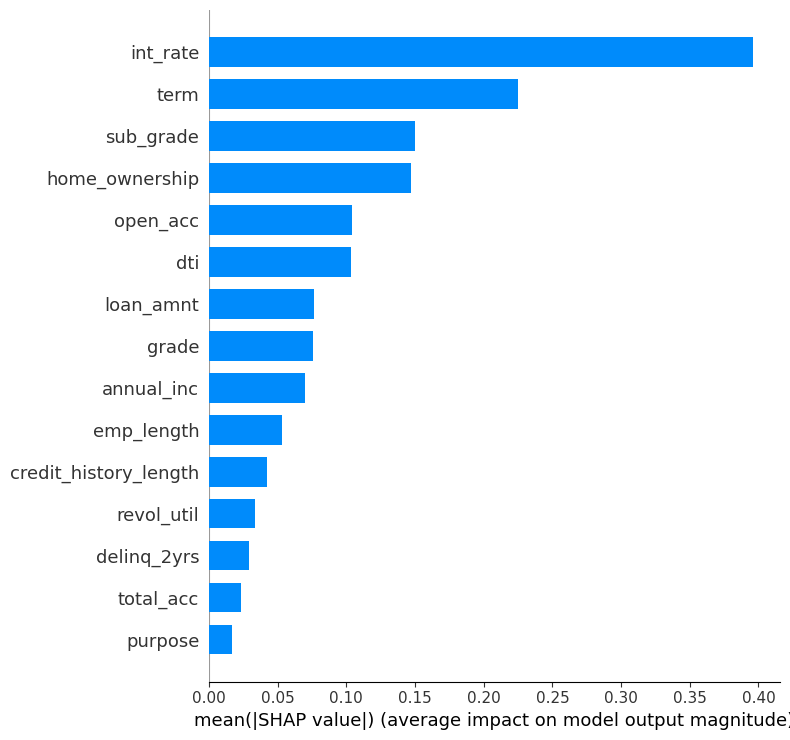

In [ ]:
# Ploting Global Feature Importance (Top Drivers)

shap.summary_plot(shap_values, X_test, plot_type='bar')

This bar chart visualizes the average magnitude of each feature’s SHAP value across all predictions. In simple terms:

“Which features change the model’s prediction the most — on average — across all borrowers?”

Higher = more influence.

Eg-1: High interest often signals higher risk or bad credit → more defaults

2:Longer terms can increase risk due to more time for economic shifts or borrower fatigue.  etc

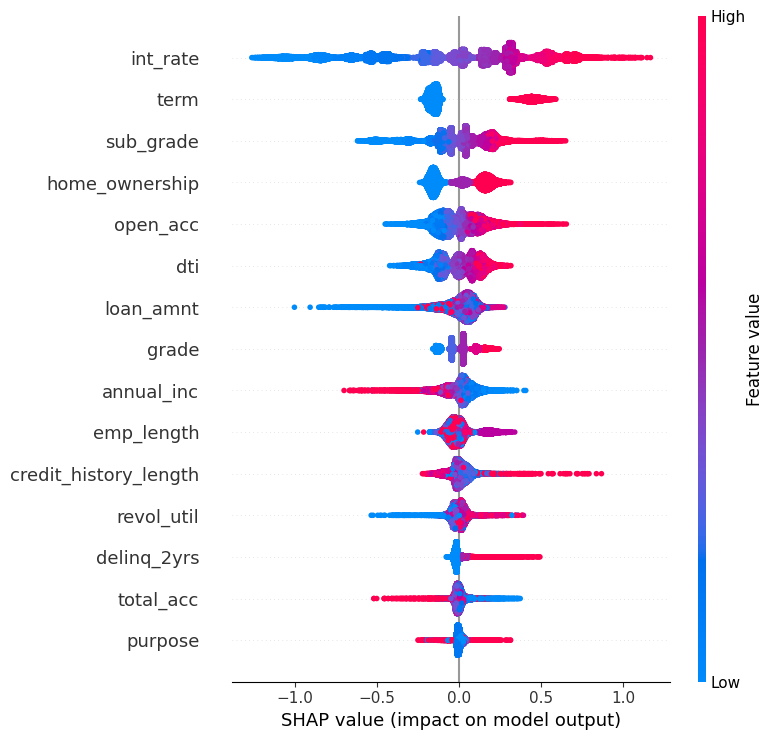

In [ ]:
#  Plot Detailed Feature Impact (SHAP Beeswarm)

shap.summary_plot(shap_values, X_test)

SHAP Beeswarm Plot shows how each feature contributes to each prediction in the dataset.

Each dot = one borrower (row).

X-axis (SHAP value) = how much that feature pushed the prediction toward default (right) or no default (left).

Color = the feature’s value (red = high, blue = low).

Interpreting the plot -

**int_rate**	 Higher interest rate (red) → pushes predictions strongly right toward default

**term** Longer terms (red) push toward default; shorter terms (blue) have little or even negative effect

**sub_grade** Lower credit quality grades (red) → default; good grades (blue) pull predictions back

**home_ownership**	Renters (higher values) tend to default more than homeowners

In [ ]:
#  Individual Borrower Predictions

i = 123 # index of borrower in X_test
# For binary classification, shap_values is a list of arrays — usually index 1 = class "1" (default)
# But some SHAP versions return just one array for the positive class
shap.force_plot(
    explainer.expected_value,           # Not explainer.expected_value[1]
    shap_values[i],                     # Or shap_values[1][i] if it's a list of 2 arrays
    X_test.iloc[i]
)



In [ ]:
# Use the trained explainer and a single test row (in double brackets for DataFrame shape)
shap.plots.force(explainer(X_test.iloc[[i]]))


In [ ]:
# Saving the interactive force plot as HTML
force_plot = shap.force_plot(explainer.expected_value, shap_values[i], X_test.iloc[i])
shap.save_html("force_plot.html", force_plot)




 **Feature	Value	Interpretation**

loan_amnt = 20,000
High	Large loan → more risk to repay

revol_util = 79	Very high	79% of revolving credit used → bad sign

home_ownership = 3	Possibly “RENT”	No owned property → less financial cushion

These arrows are long and red, meaning they had a strong negative impact on the model's confidence in repayment.

Final Prediction:
f(x) = -0.68
Since it's negative and far from 0, this means the model is confident the borrower will NOT default — despite some warning signs like loan amount and revol_util.



# **Tuning the threshold based on precision-recall**

In [ ]:
from lightgbm import LGBMClassifier

# Best Parameters from Optuna
from lightgbm import LGBMClassifier

# Best parameters from final Optuna run (Trial 25)
best_params = {
  'learning_rate': 0.14322089312481434,
  'num_leaves': 68,
  'max_depth': 3,
  'min_child_samples': 100,
  'subsample': 0.8991858614907839,
  'colsample_bytree': 0.5124235186783319,
  'random_state': 42
}


# Train final model
best_model = LGBMClassifier(**best_params)
best_model.fit(X_train, y_train)


# Recreataing and training the model
best_model = LGBMClassifier(**best_params)
best_model.fit(X_train, y_train)



LGBMClassifier(colsample_bytree=0.5124235186783319,
               learning_rate=0.14322089312481434, max_depth=3,
               min_child_samples=100, num_leaves=68, random_state=42,
               subsample=0.8991858614907839)

This creates a new LightGBM classifier, but with the exact best set of parameters (found by Optuna) that gave the highest AUC-ROC score during tuning.

In [ ]:
y_proba = best_model.predict_proba(X_test)[:, 1]


This generates the predicted probability that each borrower will default (class = 1), from your final LightGBM model.

It doesn't classify borrowers yet.

It just gives a risk score between 0 and 1 for each borrower.

In [ ]:
import json
with open("best_params.json", "w") as f:
    json.dump(study.best_params, f)


In [ ]:
with open("best_params.json", "r") as f:
    best_params = json.load(f)


✅ Best Threshold: 0.232


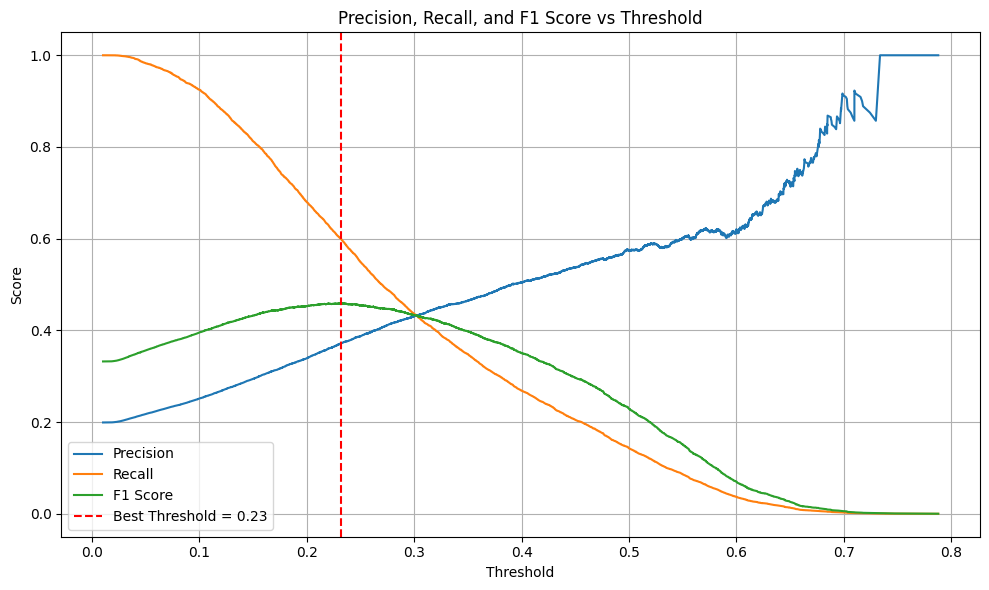


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81     28198
           1       0.37      0.60      0.46      7018

    accuracy                           0.72     35216
   macro avg       0.63      0.67      0.63     35216
weighted avg       0.78      0.72      0.74     35216


🔢 Confusion Matrix:
[[21086  7112]
 [ 2803  4215]]

📈 AUC-ROC Score: 0.7419


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, roc_auc_score

# STEP 1: Get probability predictions from your best model
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probability of default (class = 1)

# STEP 2: Compute Precision, Recall, and F1 at various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

# STEP 3: Find the threshold that gives best F1 Score
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f" Best Threshold: {best_threshold:.3f}")

# STEP 4: Plot Precision-Recall-F1 vs Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, f1_scores[:-1], label='F1 Score')
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1 Score vs Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# STEP 5: Use the best threshold for classification
y_pred_optimized = (y_proba >= best_threshold).astype(int)

# STEP 6: Final Evaluation
print("\n Classification Report:")
print(classification_report(y_test, y_pred_optimized))

print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_optimized))

print(f"\n AUC-ROC Score: {roc_auc_score(y_test, y_proba):.4f}")


achieved a more balanced trade-off between catching defaulters (recall) and reducing false alarms (precision).

The F1 score improved, which means better balance between precision and recall for defaulters.

Think of this like tuning the sensitivity of a fraud detection system.

At threshold = 0.5: You miss fewer frauds but wrongly block more genuine users.

At threshold = 0.23: You catch more genuine defaulters with fewer false alarms, though slightly fewer than before.

In [ ]:
# Saving this Threshold & Using in Final Predictions

final_preds = (y_proba >= 0.23).astype(int)


Feature Segment Analysis (Business Insight)

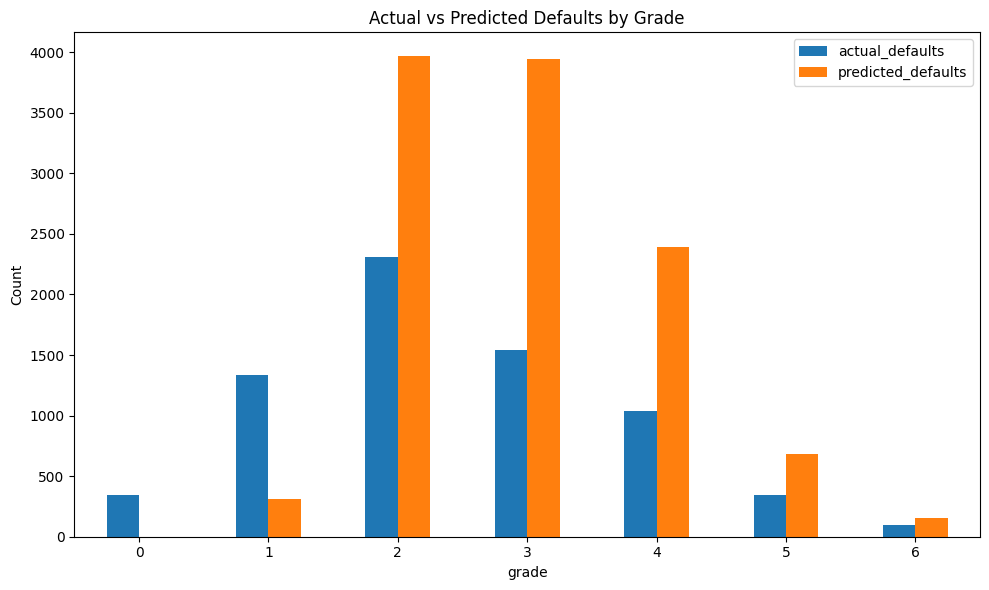

In [ ]:
# Exploring who is defaulting most (segment-wise):

# First, add prediction and probability to X_test
X_test_copy = X_test.copy()  # to avoid modifying original test set

# Add predicted class based on best threshold (e.g., 0.23)
X_test_copy['prediction'] = (y_proba >= 0.23).astype(int)

# Add actual labels
X_test_copy['actual'] = y_test.values

# Add predicted probabilities
X_test_copy['probability'] = y_proba

# Now you can do segment-wise analysis
# For example: Default rate by loan grade
default_by_grade = X_test_copy.groupby('grade').agg(
    total_loans=('prediction', 'count'),
    predicted_defaults=('prediction', 'sum'),
    actual_defaults=('actual', 'sum'),
    avg_probability=('probability', 'mean')
).reset_index()

import matplotlib.pyplot as plt

# Visualize actual vs predicted defaults
default_by_grade.plot(
    x='grade', y=['actual_defaults', 'predicted_defaults'], kind='bar',
    title='Actual vs Predicted Defaults by Grade', figsize=(10,6)
)
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



1. Overprediction of Defaults (Orange > Blue):
For grade 2, 3, and 4, the model is predicting many more defaults than actually occurred.

This means the model might be too conservative (flagging more borrowers as risky than necessary).

Especially in grades 3 and 4, which seem to have a large jump in predicted defaults.

2. Underprediction (Blue > Orange):
At grade 1, actual defaults are far higher than predicted — a potential missed risk segment.

3. Grade 0 & 6:
Very few samples → lower statistical confidence; they may be edge cases.



The model is risk-averse—preferring to flag more possible defaulters (potentially good for fraud mitigation or conservative loan policy).

In [ ]:
# Assuming y_proba and best_threshold are already defined
best_threshold = 0.23  # or whatever you got earlier
y_pred_final = (y_proba >= best_threshold).astype(int)


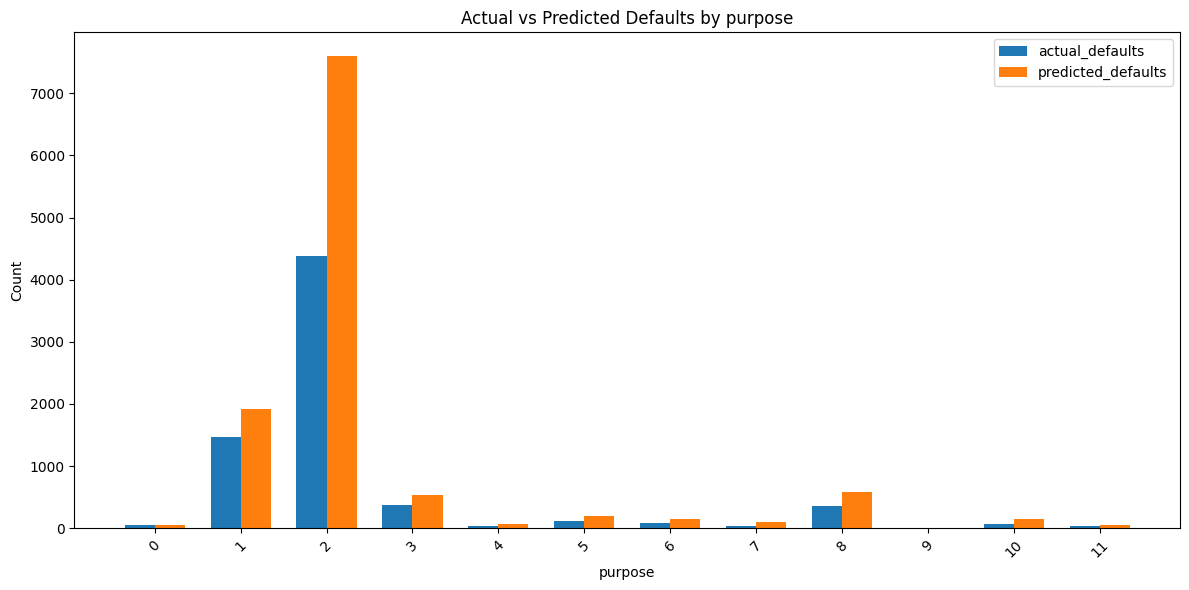

In [ ]:
X_test_plot = X_test.copy()
X_test_plot['actual'] = y_test
X_test_plot['predicted'] = y_pred_final

# Choose a feature for analysis
feature = 'purpose'  # You can also try 'home_ownership' or 'int_rate' (after binning)

# Group and summarize
summary = X_test_plot.groupby(feature).agg(
    actual_defaults=('actual', 'sum'),
    predicted_defaults=('predicted', 'sum')
).reset_index()

# Plot
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(summary))

plt.bar(index, summary['actual_defaults'], bar_width, label='actual_defaults')
plt.bar([i + bar_width for i in index], summary['predicted_defaults'], bar_width, label='predicted_defaults')

plt.xlabel(feature)
plt.ylabel('Count')
plt.title(f'Actual vs Predicted Defaults by {feature}')
plt.xticks([i + bar_width / 2 for i in index], summary[feature], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

shows how performance varies across segments like purpose